In [1]:
'''
This code has been developed @2023 by Hao Tang and Aref Miri Rekavandi
The results are going to be published in Scientitific Report within a paper entitled:

Analysis and Evaluation of Explainable Artificial
Intelligence on Suicide Risk Assessment
'''
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import Perceptron
import xgboost as xgb
from ctgan import CTGAN
import rdt
from rdt import HyperTransformer
import json
import shap
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTENC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
path = "dataset.csv" 

augment=True

origin = pd.read_csv(path)
include_feature = ['Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
               'Civil Status' ,'Education Level' ,'Psychiatric Disorders' , 'Alcohol/ drug Consumption', 'Past Illnesses' ,
                'Anger', 'Lifetime Psychiatric Hospitalizations' ,
               'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
               
               'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated', 'Age', 'Not Suicide(0)/Suicide(1)']


data = origin[include_feature]

category_col =['Gender','Religon', 'Race', 'Nature Of Occupation' ,
               'Civil Status' ,'Education Level','Psychiatric Disorders','Alcohol/ drug Consumption','Past Illnesses'] 
labelEncoder = preprocessing.LabelEncoder()
mapping_dict={}
for col in category_col:
    data[col] = labelEncoder.fit_transform(data[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
cols=data.columns
data.to_csv('Processed_dataset.csv')
print(data.head(20))
print(data.describe())
print(data.shape)
n_run=100


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

    Gender  Religon  Race  Nature Of Occupation  Civil Status  \
0        0        3     1                     0             2   
1        0        3     1                     8             1   
2        1        3     1                     9             1   
3        1        1     3                    12             1   
4        1        3     1                     4             2   
5        1        4     3                     1             2   
6        1        1     0                     2             1   
7        1        0     3                    12             1   
8        1        1     0                     2             2   
9        1        2     4                     2             1   
10       1        0     3                    12             1   
11       1        1     0                     3             1   
12       1        0     3                     1             1   
13       1        0     3                    10             1   
14       1        2     4

In [3]:
data.head()

,Gender,Religon,Race,Nature Of Occupation,Civil Status,Education Level,Psychiatric Disorders,Alcohol/ drug Consumption,Past Illnesses,Anger,Lifetime Psychiatric Hospitalizations,Past Suicide Attempts,Any suicidal thoughts mentioned,Self-Injurious Behaviour,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated,Age,Not Suicide(0)/Suicide(1)
0,0,3,1,0,2,0,6,2,0,0,0,0,0,0,0,0,0,0,30,0
1,0,3,1,8,1,6,6,2,8,0,0,0,0,0,1,0,0,0,91,0
2,1,3,1,9,1,6,6,2,4,0,0,0,0,0,1,0,0,0,85,0
3,1,1,3,12,1,5,6,0,3,1,1,1,1,0,1,1,1,1,87,1
4,1,3,1,4,2,1,6,2,1,0,0,1,0,0,1,0,1,1,59,0


(10000, 19)
[ 1.  2.  4. 12.  1.  4.  6.  2.  5.  1.  0.  0.  0.  0.  1.  0.  1.  1.
 60.]


Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Solver terminated early 

Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Solver terminated early 

Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Solver terminated early 

Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Solver terminated early 

Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Solver terminated early 

Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Solver terminated early 

SVM:

Mean Accuracy: 94.99 STD: 2.320179590750109
Mean Precision: 94.07293171620678 STD: 2.9429317581953685
Mean Recall: 96.09672841674568 STD: 2.1390932016551423
Mean F1_Score: 95.05410535810188 STD: 2.214082343563318
Mean AUC: 94.99210201452745 STD: 2.330322779877763
Sample Confusion Matrix: [[143   9]
 [  2 146]]
Logistic Regression:

Mean Accuracy: 95.86666666666667 STD: 0.9988882709181135
Mean Precision: 95.00258953484835 STD: 1.6927968157569366
Mean Recall: 96.88405461525748 STD: 1.5522559843943298
Mean F1_Score: 95.91618997260404 STD: 0.9664496758363977
Mean AUC: 93.31562467254253 STD: 1.3618448319723215
Sample Confusion Matrix: [[144   8]
 [  2 146]]
Decision Tree:

Mean Accuracy: 93.3 STD: 1.3707256796634761
Mean Precision: 93.3173042163219 STD: 2.1833643060929195
Mean Recall: 93.36590913477423 STD: 2.00965169235879
Mean F1_Score: 93.31439298543754 STD: 1.369479742927989
Mean AUC: 95.87319210113726 STD: 1.0077654701816179
Sample Confusion Matrix: [[139  13]
 [  6 142]]
Random 

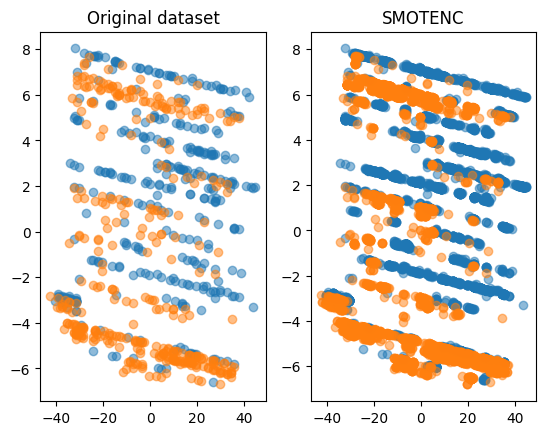

In [4]:
logi_acc=[]; logi_precision=[]; logi_recall=[]; logi_f1_score=[]; logi_auc=[]
DT_acc=[]; DT_precision=[]; DT_recall=[]; DT_f1_score=[]; DT_auc=[]
RF_acc=[]; RF_precision=[]; RF_recall=[]; RF_f1_score=[]; RF_auc=[]
SVM_acc=[]; SVM_precision=[]; SVM_recall=[]; SVM_f1_score=[]; SVM_auc=[]
Perc_acc=[]; Perc_precision=[]; Perc_recall=[]; Perc_f1_score=[]; Perc_auc=[]
XGB_acc=[]; XGB_precision=[]; XGB_recall=[]; XGB_f1_score=[]; XGB_auc=[]

X = data.values[:, 0:int(data.shape[1]-1)]
y = data.values[:,-1]





for i in range(n_run):
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
      
    if augment==True:

        ada=SMOTENC(sampling_strategy={1: 5000, 0: 5000},categorical_features=[0,1,2,3,4,5,6,7,8],k_neighbors=5)

        X_train_a, y_train_a = ada.fit_resample(X_train, y_train)

        if i==0:
            pca = PCA(n_components=2)        
            X_vis = pca.fit_transform(X_train)
            X_res_vis = pca.transform(X_train_a)
            
            print(X_train_a.shape)
            print(X_train_a[0,:])
            # Two subplots, unpack the axes array immediately
            f, (ax1, ax2) = plt.subplots(1, 2)

            c0 = ax1.scatter(X_vis[y_train == 0, 0], X_vis[y_train == 0, 1], label="Class #0",
                 alpha=0.5)
            c1 = ax1.scatter(X_vis[y_train == 1, 0], X_vis[y_train == 1, 1], label="Class #1",
                 alpha=0.5)
            ax1.set_title('Original dataset')

            ax2.scatter(X_res_vis[y_train_a == 0, 0], X_res_vis[y_train_a == 0, 1],
            label="Class #0", alpha=0.5)
            ax2.scatter(X_res_vis[y_train_a == 1, 0], X_res_vis[y_train_a == 1, 1],
            label="Class #1", alpha=0.5)
            ax2.set_title('SMOTENC')
        y_train=y_train_a
        X_train=X_train_a
        temp_data=np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
        to_augment=pd.DataFrame(temp_data, columns = cols)
        to_augment.groupby('Not Suicide(0)/Suicide(1)').mean()
    
    #SVM (using default model)
    supportvm = svm.SVC(kernel='linear',max_iter=5000) # Linear Kernel
    supportvm.fit(X_train, y_train)
    y_pred = supportvm.predict(X_test)
    SVM_acc.append(100*metrics.accuracy_score(y_test, y_pred))
    cnf_matrix_SVM=metrics.confusion_matrix(y_test, y_pred)
    SVM_precision.append(100*metrics.precision_score(y_test, y_pred))
    SVM_recall.append(100*metrics.recall_score(y_test, y_pred))
    SVM_f1_score.append(2*100*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)/(metrics.recall_score(y_test, y_pred)+metrics.precision_score(y_test, y_pred)))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    SVM_auc.append(100*auc(false_positive_rate, true_positive_rate))
    
    # Logistic Regression (using the default parameters)
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    y_pred=logreg.predict(X_test)
    logi_acc.append(100*metrics.accuracy_score(y_test, y_pred))
    cnf_matrix_logi=metrics.confusion_matrix(y_test, y_pred)
    logi_precision.append(100*metrics.precision_score(y_test, y_pred))
    logi_recall.append(100*metrics.recall_score(y_test, y_pred))
    logi_f1_score.append(2*100*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)/(metrics.recall_score(y_test, y_pred)+metrics.precision_score(y_test, y_pred)))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    DT_auc.append(100*auc(false_positive_rate, true_positive_rate))
    
    
    # Decision Tree (using the default parameters)
    decision_model = DecisionTreeClassifier()
    decision_model = decision_model.fit(X_train,y_train)
    y_pred = decision_model.predict(X_test)
    DT_acc.append(100*metrics.accuracy_score(y_test, y_pred))
    cnf_matrix_DT=metrics.confusion_matrix(y_test, y_pred)
    DT_precision.append(100*metrics.precision_score(y_test, y_pred))
    DT_recall.append(100*metrics.recall_score(y_test, y_pred))
    DT_f1_score.append(2*100*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)/(metrics.recall_score(y_test, y_pred)+metrics.precision_score(y_test, y_pred)))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    logi_auc.append(100*auc(false_positive_rate, true_positive_rate))
    
    # Rndom Forest (usin the default parameter)
    rfc=RandomForestClassifier()
    rfc.fit(X_train,y_train)
    y_pred=rfc.predict(X_test)
    RF_acc.append(100*metrics.accuracy_score(y_test, y_pred))
    cnf_matrix_RF=metrics.confusion_matrix(y_test, y_pred)
    RF_precision.append(100*metrics.precision_score(y_test, y_pred))
    RF_recall.append(100*metrics.recall_score(y_test, y_pred))
    RF_f1_score.append(2*100*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)/(metrics.recall_score(y_test, y_pred)+metrics.precision_score(y_test, y_pred)))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    RF_auc.append(100*auc(false_positive_rate, true_positive_rate))
   
    
    # Perceptron (default model)
    clf = Perceptron(max_iter=100, tol=None)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    Perc_acc.append(100*metrics.accuracy_score(y_test, y_pred))
    cnf_matrix_Perc=metrics.confusion_matrix(y_test, y_pred)
    Perc_precision.append(100*metrics.precision_score(y_test, y_pred))
    Perc_recall.append(100*metrics.recall_score(y_test, y_pred))
    Perc_f1_score.append(2*100*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)/(metrics.recall_score(y_test, y_pred)+metrics.precision_score(y_test, y_pred)))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    Perc_auc.append(100*auc(false_positive_rate, true_positive_rate))
 
    #XGBoost (default model)
    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(X_train, y_train)
    y_pred=xgb_model.predict(X_test)
    y_pred = np.where(y_pred >= 0.5, 1, 0)
    XGB_acc.append(100*metrics.accuracy_score(y_test, y_pred))
    cnf_matrix_XGB=metrics.confusion_matrix(y_test, y_pred)
    XGB_precision.append(100*metrics.precision_score(y_test, y_pred))
    XGB_recall.append(100*metrics.recall_score(y_test, y_pred))
    XGB_f1_score.append(2*100*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)/(metrics.recall_score(y_test, y_pred)+metrics.precision_score(y_test, y_pred)))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    XGB_auc.append(100*auc(false_positive_rate, true_positive_rate))


print('SVM:\n')
print(f'Mean Accuracy: {np.mean(SVM_acc)} STD: {np.std(SVM_acc)}')
print(f'Mean Precision: {np.mean(SVM_precision)} STD: {np.std(SVM_precision)}')
print(f'Mean Recall: {np.mean(SVM_recall)} STD: {np.std(SVM_recall)}')
print(f'Mean F1_Score: {np.mean(SVM_f1_score)} STD: {np.std(SVM_f1_score)}')
print(f'Mean AUC: {np.mean(SVM_auc)} STD: {np.std(SVM_auc)}')
print(f'Sample Confusion Matrix: {cnf_matrix_SVM}')
print('===========================================================')

print('Logistic Regression:\n')
print(f'Mean Accuracy: {np.mean(logi_acc)} STD: {np.std(logi_acc)}')
print(f'Mean Precision: {np.mean(logi_precision)} STD: {np.std(logi_precision)}')
print(f'Mean Recall: {np.mean(logi_recall)} STD: {np.std(logi_recall)}')
print(f'Mean F1_Score: {np.mean(logi_f1_score)} STD: {np.std(logi_f1_score)}')
print(f'Mean AUC: {np.mean(logi_auc)} STD: {np.std(logi_auc)}')
print(f'Sample Confusion Matrix: {cnf_matrix_logi}')
print('===========================================================')

print('Decision Tree:\n')
print(f'Mean Accuracy: {np.mean(DT_acc)} STD: {np.std(DT_acc)}')
print(f'Mean Precision: {np.mean(DT_precision)} STD: {np.std(DT_precision)}')
print(f'Mean Recall: {np.mean(DT_recall)} STD: {np.std(DT_recall)}')
print(f'Mean F1_Score: {np.mean(DT_f1_score)} STD: {np.std(DT_f1_score)}')
print(f'Mean AUC: {np.mean(DT_auc)} STD: {np.std(DT_auc)}')
print(f'Sample Confusion Matrix: {cnf_matrix_DT}')
print('===========================================================')

print('Random Forest:\n')
print(f'Mean Accuracy: {np.mean(RF_acc)} STD: {np.std(RF_acc)}')
print(f'Mean Precision: {np.mean(RF_precision)} STD: {np.std(RF_precision)}')
print(f'Mean Recall: {np.mean(RF_recall)} STD: {np.std(RF_recall)}')
print(f'Mean F1_Score: {np.mean(RF_f1_score)} STD: {np.std(RF_f1_score)}')
print(f'Mean AUC: {np.mean(RF_auc)} STD: {np.std(RF_auc)}')
print(f'Sample Confusion Matrix: {cnf_matrix_RF}')
print('===========================================================')


print('Perceptron:\n')
print(f'Mean Accuracy: {np.mean(Perc_acc)} STD: {np.std(Perc_acc)}')
print(f'Mean Precision: {np.mean(Perc_precision)} STD: {np.std(Perc_precision)}')
print(f'Mean Recall: {np.mean(Perc_recall)} STD: {np.std(Perc_recall)}')
print(f'Mean F1_Score: {np.mean(Perc_f1_score)} STD: {np.std(Perc_f1_score)}')
print(f'Mean AUC: {np.mean(Perc_auc)} STD: {np.std(Perc_auc)}')
print(f'Sample Confusion Matrix: {cnf_matrix_Perc}')
print('===========================================================')

print('XGBoost:\n')
print(f'Mean Accuracy: {np.mean(XGB_acc)} STD: {np.std(XGB_acc)}')
print(f'Mean Precision: {np.mean(XGB_precision)} STD: {np.std(XGB_precision)}')
print(f'Mean Recall: {np.mean(XGB_recall)} STD: {np.std(XGB_recall)}')
print(f'Mean F1_Score: {np.mean(XGB_f1_score)} STD: {np.std(XGB_f1_score)}')
print(f'Mean AUC: {np.mean(XGB_auc)} STD: {np.std(XGB_auc)}')
print(f'Sample Confusion Matrix: {cnf_matrix_XGB}')
print('===========================================================')
    

In [24]:
#XGBoost (default model)
X = data.values[:, 0:int(data.shape[1]-1)]
y = data.values[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred=xgb_model.predict(X_test)


# Feature importance
input_data=data.drop('Not Suicide(0)/Suicide(1)',axis=1)
features=input_data.columns

plt.figure(figsize=(25, 5))
plt.bar(range(len(features)), xgb_model.feature_importances_)
plt.xticks(range(len(features)), features, rotation=-45, fontsize=14)
plt.title('Feature importance', fontsize=14)
    

Text(0.5, 1.0, 'Feature importance')

In [25]:
explainer = shap.TreeExplainer(xgb_model)

shap_values = explainer.shap_values(input_data[features])
print(shap_values.shape)

y_base = explainer.expected_value
print(y_base)

input_data['pred'] = xgb_model.predict(input_data[features])
print(input_data['pred'].mean())

(1000, 19)
0.5085714
0.5019635


[11:41:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

In [26]:
j = 5
player_explainer = pd.DataFrame()
player_explainer['feature'] = features
player_explainer['feature_value'] = input_data[features].iloc[j].values
player_explainer['shap_value'] = shap_values[j]

print('y_base + sum_of_shap_values: %.2f'%(y_base + player_explainer['shap_value'].sum()))
print('y_pred: %.2f'%(input_data['pred'].iloc[j]))

player_explainer  

y_base + sum_of_shap_values: 1.00
y_pred: 1.00


,feature,feature_value,shap_value
0,Gender,1,0.008651
1,Religon,4,-0.058939
2,Race,3,0.005136
3,Nature Of Occupation,1,0.004291
4,Civil Status,2,0.002255
5,Education Level,3,0.018736
6,Psychiatric Disorders,6,-0.001427
7,Alcohol/ drug Consumption,0,0.012071
8,Past Illnesses,8,0.009639
9,Anger,1,0.099509


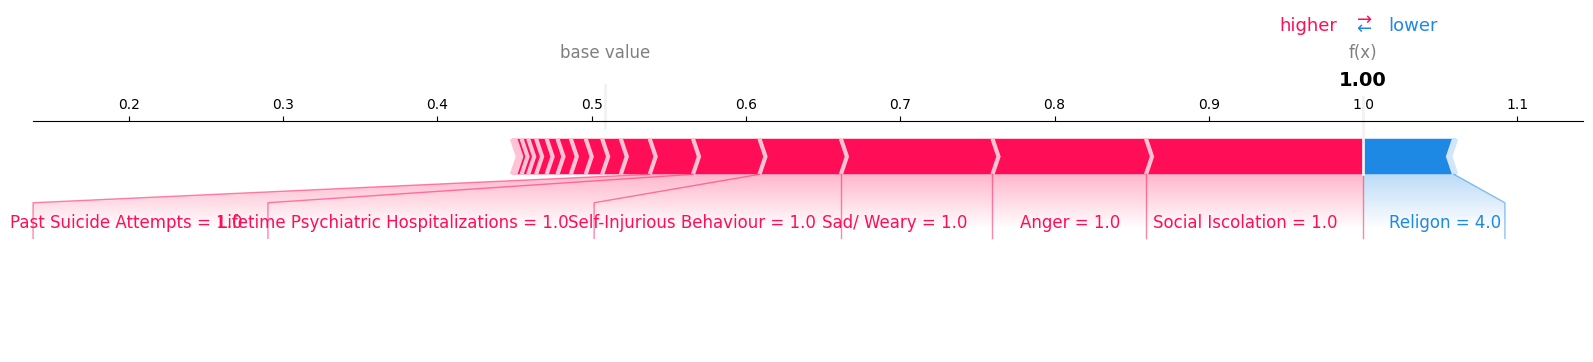

In [27]:
shap.force_plot(explainer.expected_value, shap_values[j], input_data[features].iloc[j], show=False,matplotlib=True)

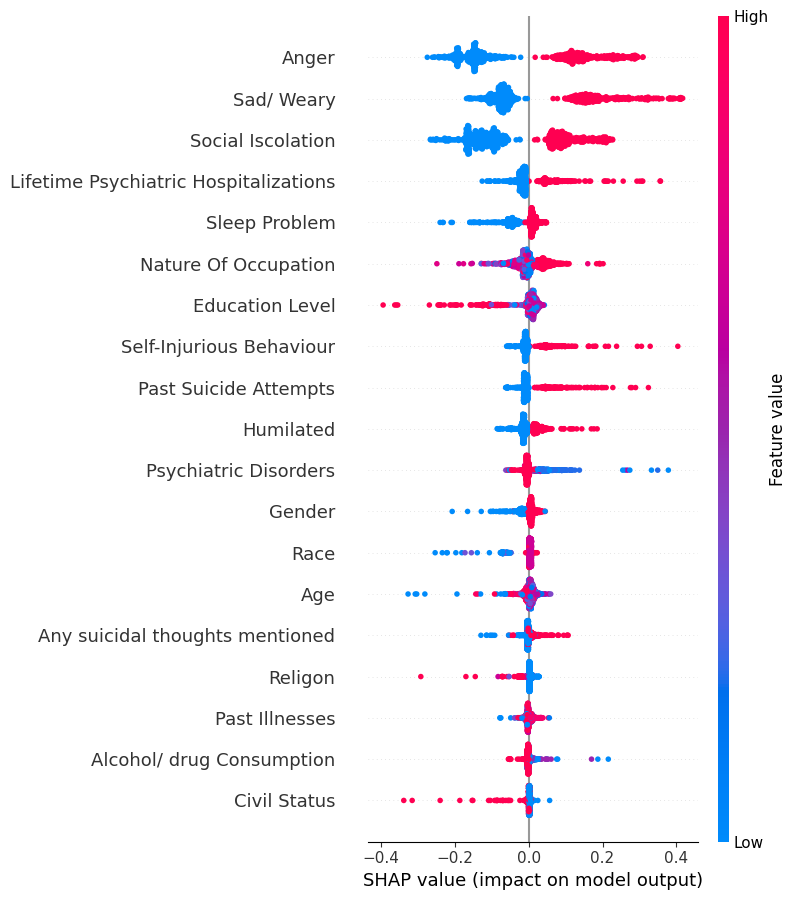

In [30]:
t=shap.summary_plot(shap_values, input_data[features], show=True)

filepath = 'C:/Users/61450/Desktop/Python projects/Suicide Prediction/GitHub/'
fig_name = 'shap.jpg'

fig_path = filepath + '/' + fig_name

plt.savefig(fig_path, dpi = 500,bbox_inches = 'tight')

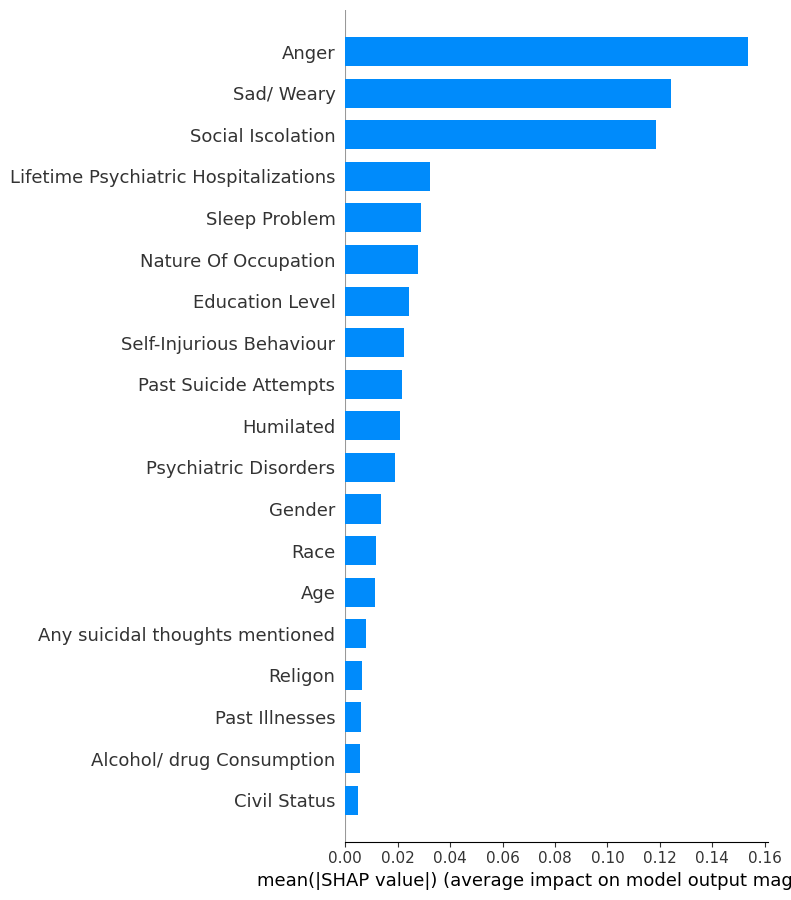

In [31]:
t=shap.summary_plot(shap_values, input_data[features], plot_type="bar", show=True)
filepath = 'C:/Users/61450/Desktop/Python projects/Suicide Prediction/GitHub/'
fig_name = 'bar_importance.jpg'

fig_path = filepath + '/' + fig_name

plt.savefig(fig_path, dpi = 500,bbox_inches = 'tight')

<Figure size 640x480 with 0 Axes>

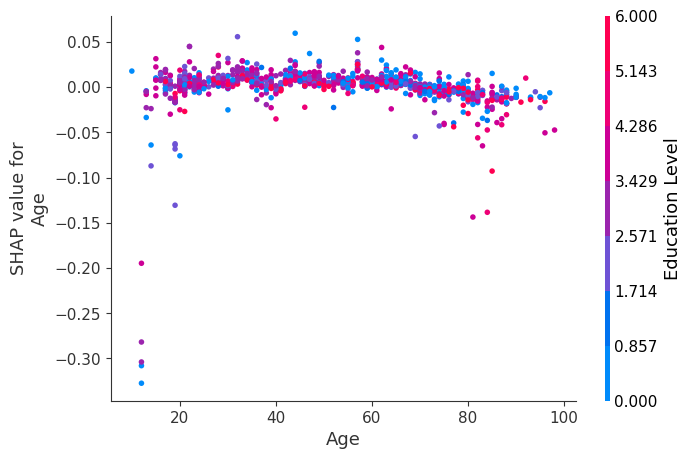

In [32]:
shap.dependence_plot('Age', shap_values, input_data[features], interaction_index='Education Level', show=True)